✅ CSV saved to: /home/sit/Desktop/Cake-plot/bbr3_2flows_2upload/cubic_vs_bbr3_upload


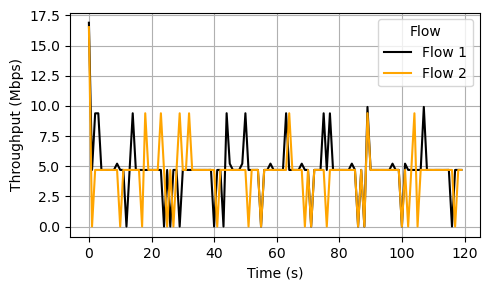

✅ Saved: /home/sit/Desktop/Cake-plot/bbr3_2flows_2upload/bbrv3_plots/throughput.png


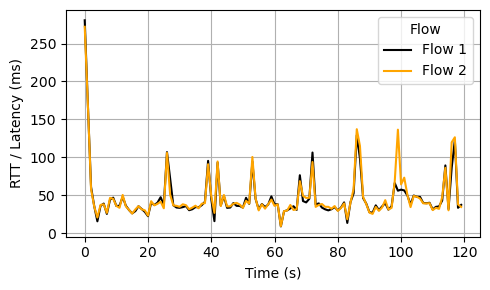

✅ Saved: /home/sit/Desktop/Cake-plot/bbr3_2flows_2upload/bbrv3_plots/rtt.png


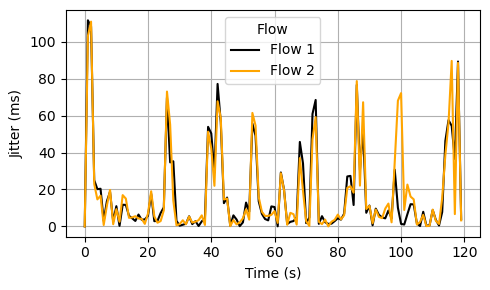

✅ Saved: /home/sit/Desktop/Cake-plot/bbr3_2flows_2upload/bbrv3_plots/jitter.png


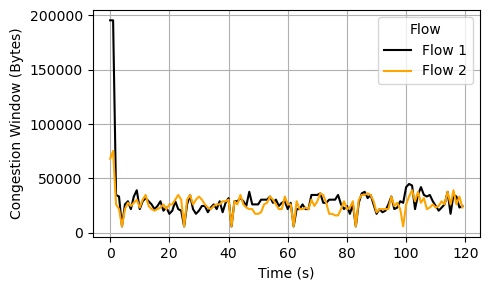

✅ Saved: /home/sit/Desktop/Cake-plot/bbr3_2flows_2upload/bbrv3_plots/cwnd.png


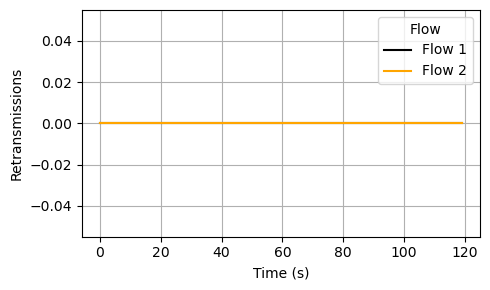

✅ Saved: /home/sit/Desktop/Cake-plot/bbr3_2flows_2upload/bbrv3_plots/retransmits.png


In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms

        metrics.append({
            "time_sec": i + time_offset,  # 🕒 Add offset for staggered start
            "throughput_mbps": stream.get("bits_per_second", 0) / 1e6,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)


def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    color_map = {
        "Flow 1": "black",
        "Flow 2": "orange"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        plt.plot(group["time_sec"], group[metric], label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Flow")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")



def process_tcp_flows(folder_path, file_pattern, output_csv_name, algo_name):
    all_data = []

    for i in range(1, 3):
        filename = file_pattern.format(i)
        filepath = os.path.join(folder_path, filename)
        label = f"Flow {i}"
        if os.path.exists(filepath):
            time_offset = 0  # ⏱️ Stagger each flow by 15s
            df = extract_metrics(filepath, label, time_offset)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)
    
    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create directory for plots
    plot_dir = os.path.join(folder_path, f"{algo_name.lower()}_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", f"", os.path.join(plot_dir, "throughput.png"))
    plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", f"", os.path.join(plot_dir, "rtt.png"))
    plot_metric(df_all, "jitter_ms", "Jitter (ms)", f"", os.path.join(plot_dir, "jitter.png"))
    plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", f"", os.path.join(plot_dir, "cwnd.png"))
    plot_metric(df_all, "retransmits", "Retransmissions", f"", os.path.join(plot_dir, "retransmits.png"))

# --------------------------------------------
# ✅ Example: To run it (e.g., for BBRv3)
# process_tcp_flows(
#     folder_path="/home/sit/Downloads/Test_C/bbrv3 staggered_3 flows",
#     file_pattern="bbr3_15s_ststaggered_flow{}.json",  # Adjust pattern as needed
#     output_csv_name="tcp_metrics_3_flows_15s_staggered.csv",
#     algo_name="BBRv3"
# )
process_tcp_flows(
    folder_path="/home/sit/Desktop/Cake-plot/bbr3_2flows_2upload",
    file_pattern="bbr3_flow{}_1.json",  # Match actual filenames
    output_csv_name="cubic_vs_bbr3_upload",
    algo_name="BBRv3"
)


✅ CSV saved to: /home/sit/Desktop/Cake-plot/bbr3_2flows_download_sender/bbr3_vs_bbr3_download


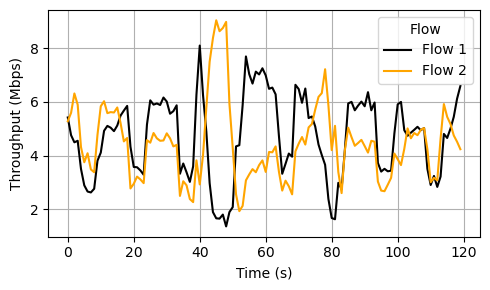

✅ Saved: /home/sit/Desktop/Cake-plot/bbr3_2flows_download_sender/bbrv3_plots/throughput.png


In [2]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms

        metrics.append({
            "time_sec": i + time_offset,  # 🕒 Add offset for staggered start
            "throughput_mbps": stream.get("bits_per_second", 0) / 1e6,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)


def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    color_map = {
        "Flow 1": "black",
        "Flow 2": "orange"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        plt.plot(group["time_sec"], group[metric], label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Flow")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")


# def plot_metric(df, metric, ylabel, title, save_path):
#     plt.figure(figsize=(5, 3))
#     for label, group in df.groupby("label"):
#         plt.plot(group["time_sec"], group[metric], label=label)
#     plt.xlabel("Time (s)")
#     plt.ylabel(ylabel)
#     plt.title(title)
#     plt.legend(title="Flow")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.savefig(save_path)
#     plt.show()
#     plt.close()
#     print(f"✅ Saved: {save_path}")

def process_tcp_flows(folder_path, file_pattern, output_csv_name, algo_name):
    all_data = []

    for i in range(1, 3):
        filename = file_pattern.format(i)
        filepath = os.path.join(folder_path, filename)
        label = f"Flow {i}"
        if os.path.exists(filepath):
            time_offset = 0  # ⏱️ Stagger each flow by 15s
            df = extract_metrics(filepath, label, time_offset)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)
    
    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create directory for plots
    plot_dir = os.path.join(folder_path, f"{algo_name.lower()}_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", f"", os.path.join(plot_dir, "throughput.png"))
    # plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", f"", os.path.join(plot_dir, "rtt.png"))
    # plot_metric(df_all, "jitter_ms", "Jitter (ms)", f"", os.path.join(plot_dir, "jitter.png"))
    # plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", f"", os.path.join(plot_dir, "cwnd.png"))
    # plot_metric(df_all, "retransmits", "Retransmissions", f"", os.path.join(plot_dir, "retransmits.png"))

# --------------------------------------------
# ✅ Example: To run it (e.g., for BBRv3)
# process_tcp_flows(
#     folder_path="/home/sit/Downloads/Test_C/bbrv3 staggered_3 flows",
#     file_pattern="bbr3_15s_ststaggered_flow{}.json",  # Adjust pattern as needed
#     output_csv_name="tcp_metrics_3_flows_15s_staggered.csv",
#     algo_name="BBRv3"
# )
process_tcp_flows(
    folder_path="/home/sit/Desktop/Cake-plot/bbr3_2flows_download_sender",
    file_pattern="bbr3_flow{}_1.json",  # Match actual filenames
    output_csv_name="bbr3_vs_bbr3_download",
    algo_name="BBRv3"
)


✅ CSV saved to: /home/sit/Desktop/Cake-plot/cubic-vs-bbr3-upload-sender-bbr/bbr3_vs_cubic_metrics.csv


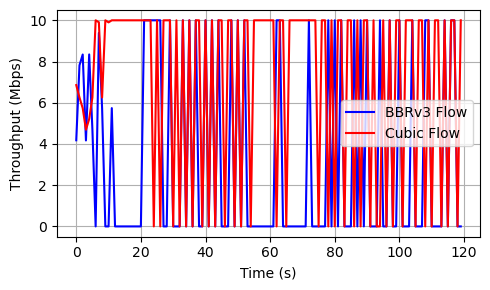

✅ Saved: /home/sit/Desktop/Cake-plot/cubic-vs-bbr3-upload-sender-bbr/mixed_algo_plots/throughput.png


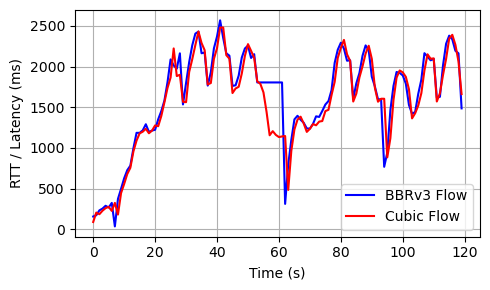

✅ Saved: /home/sit/Desktop/Cake-plot/cubic-vs-bbr3-upload-sender-bbr/mixed_algo_plots/rtt.png


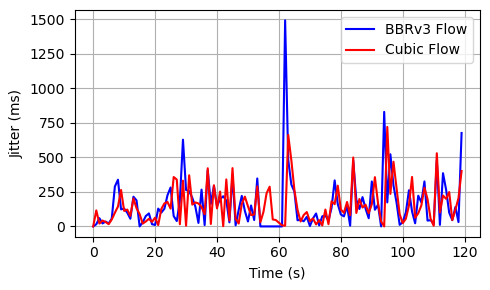

✅ Saved: /home/sit/Desktop/Cake-plot/cubic-vs-bbr3-upload-sender-bbr/mixed_algo_plots/jitter.png


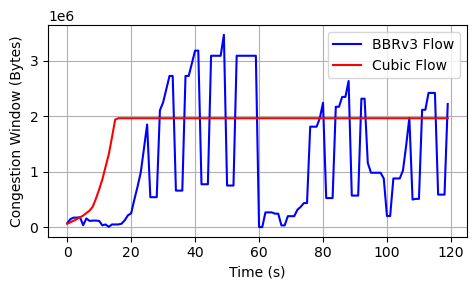

✅ Saved: /home/sit/Desktop/Cake-plot/cubic-vs-bbr3-upload-sender-bbr/mixed_algo_plots/cwnd.png


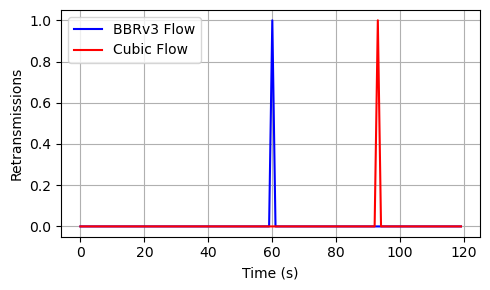

✅ Saved: /home/sit/Desktop/Cake-plot/cubic-vs-bbr3-upload-sender-bbr/mixed_algo_plots/retransmits.png


In [15]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms
        bitspersec=min(stream.get("bits_per_second", 0) / 1e6, 10)

        metrics.append({
            "time_sec": i + time_offset,  # No staggering
            "throughput_mbps": bitspersec,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)

def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    color_map = {
        "BBRv3 Flow": "blue",
        "Cubic Flow": "red"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        plt.plot(group["time_sec"], group[metric], label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")

def process_mixed_algos(folder_path, output_csv_name):
    all_data = []

    algo_files = {
        "BBRv3": "bbr3_flow1_4.json",
        "Cubic": "cubic_flow1_4.json"
    }

    for algo_name, filename in algo_files.items():
        filepath = os.path.join(folder_path, filename)
        label = f"{algo_name} Flow"
        if os.path.exists(filepath):
            df = extract_metrics(filepath, label)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)

    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create plot directory
    plot_dir = os.path.join(folder_path, "mixed_algo_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", "", os.path.join(plot_dir, "throughput.png"))
    plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", "", os.path.join(plot_dir, "rtt.png"))
    plot_metric(df_all, "jitter_ms", "Jitter (ms)", "", os.path.join(plot_dir, "jitter.png"))
    plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", "", os.path.join(plot_dir, "cwnd.png"))
    plot_metric(df_all, "retransmits", "Retransmissions", "", os.path.join(plot_dir, "retransmits.png"))

# ----------------------------------------
# ✅ Run the function with your directory
process_mixed_algos(
    folder_path="/home/sit/Desktop/Cake-plot/cubic-vs-bbr3-upload-sender-bbr",
    output_csv_name="bbr3_vs_cubic_metrics.csv"
)


✅ CSV saved to: /home/sit/Desktop/Cake-plot/cubic-vs-bbr3-upload-sender-bbr/bbr3_vs_cubic_metrics.csv


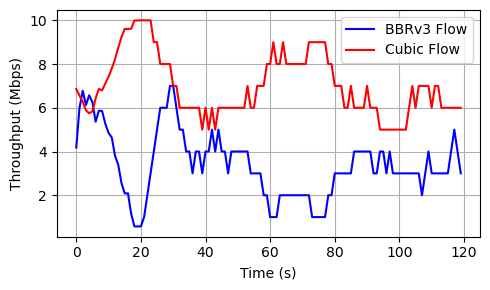

✅ Saved: /home/sit/Desktop/Cake-plot/cubic-vs-bbr3-upload-sender-bbr/mixed_algo_plots/throughput.png


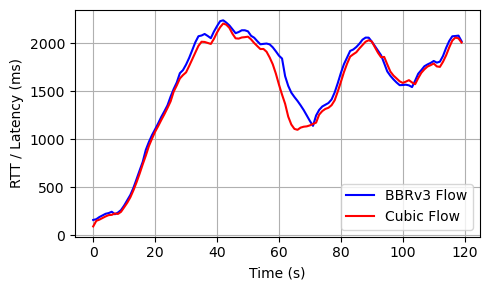

✅ Saved: /home/sit/Desktop/Cake-plot/cubic-vs-bbr3-upload-sender-bbr/mixed_algo_plots/rtt.png


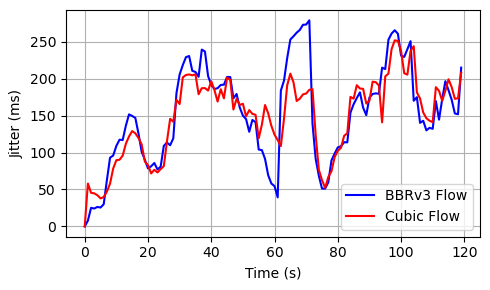

✅ Saved: /home/sit/Desktop/Cake-plot/cubic-vs-bbr3-upload-sender-bbr/mixed_algo_plots/jitter.png


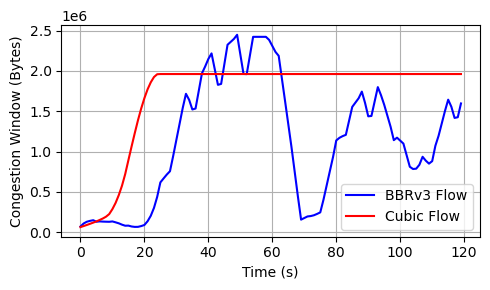

✅ Saved: /home/sit/Desktop/Cake-plot/cubic-vs-bbr3-upload-sender-bbr/mixed_algo_plots/cwnd.png


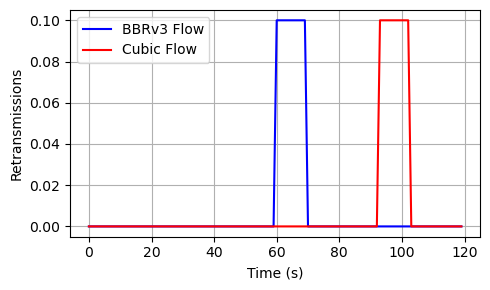

✅ Saved: /home/sit/Desktop/Cake-plot/cubic-vs-bbr3-upload-sender-bbr/mixed_algo_plots/retransmits.png


In [16]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Extract metrics from JSON
def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms
        bitspersec=min(stream.get("bits_per_second", 0) / 1e6, 10)

        metrics.append({
            "time_sec": i + time_offset,
            "throughput_mbps": bitspersec,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)

# ✅ Plot with moving average
def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    color_map = {
        "BBRv3 Flow": "blue",
        "Cubic Flow": "red"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        group_sorted = group.sort_values("time_sec")
        # Apply moving average with window of 10
        smoothed = group_sorted[metric].rolling(window=10, min_periods=1).mean()
        plt.plot(group_sorted["time_sec"], smoothed, label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")

# ✅ Process both flows and generate plots
def process_mixed_algos(folder_path, output_csv_name):
    all_data = []

    algo_files = {
        "BBRv3": "bbr3_flow1_4.json",
        "Cubic": "cubic_flow1_4.json"
    }

    for algo_name, filename in algo_files.items():
        filepath = os.path.join(folder_path, filename)
        label = f"{algo_name} Flow"
        if os.path.exists(filepath):
            df = extract_metrics(filepath, label)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)

    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create plot directory
    plot_dir = os.path.join(folder_path, "mixed_algo_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Plot metrics with moving average
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", "", os.path.join(plot_dir, "throughput.png"))
    plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", "", os.path.join(plot_dir, "rtt.png"))
    plot_metric(df_all, "jitter_ms", "Jitter (ms)", "", os.path.join(plot_dir, "jitter.png"))
    plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", "", os.path.join(plot_dir, "cwnd.png"))
    plot_metric(df_all, "retransmits", "Retransmissions", "", os.path.join(plot_dir, "retransmits.png"))

# ✅ Run it
process_mixed_algos(
    folder_path="/home/sit/Desktop/Cake-plot/cubic-vs-bbr3-upload-sender-bbr",
    output_csv_name="bbr3_vs_cubic_metrics.csv"
)


✅ CSV saved to: /home/sit/Desktop/Cake-plot/cubic-vs-bbr3-download-sender-bbr/bbr3_vs_cubic_metrics.csv


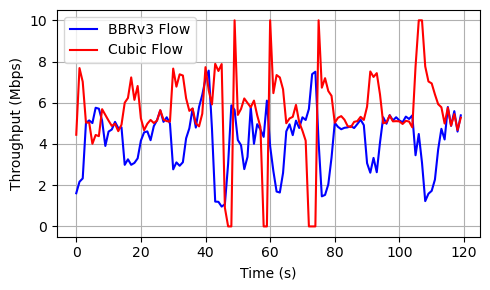

✅ Saved: /home/sit/Desktop/Cake-plot/cubic-vs-bbr3-download-sender-bbr/mixed_algo_plots/throughput.png


In [17]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms
        bitspersec=min(stream.get("bits_per_second", 0) / 1e6, 10)

        metrics.append({
            "time_sec": i + time_offset,  # No staggering
            "throughput_mbps": bitspersec,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)

def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    color_map = {
        "BBRv3 Flow": "blue",
        "Cubic Flow": "red"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        plt.plot(group["time_sec"], group[metric], label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")

def process_mixed_algos(folder_path, output_csv_name):
    all_data = []

    algo_files = {
        "BBRv3": "bbr3_flow1_2.json",
        "Cubic": "cubic_flow1_2.json"
    }

    for algo_name, filename in algo_files.items():
        filepath = os.path.join(folder_path, filename)
        label = f"{algo_name} Flow"
        if os.path.exists(filepath):
            df = extract_metrics(filepath, label)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)

    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create plot directory
    plot_dir = os.path.join(folder_path, "mixed_algo_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", "", os.path.join(plot_dir, "throughput.png"))
    # plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", "", os.path.join(plot_dir, "rtt.png"))
    # plot_metric(df_all, "jitter_ms", "Jitter (ms)", "", os.path.join(plot_dir, "jitter.png"))
    # plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", "", os.path.join(plot_dir, "cwnd.png"))
    # plot_metric(df_all, "retransmits", "Retransmissions", "", os.path.join(plot_dir, "retransmits.png"))

# ----------------------------------------
# ✅ Run the function with your directory
process_mixed_algos(
    folder_path="/home/sit/Desktop/Cake-plot/cubic-vs-bbr3-download-sender-bbr",
    output_csv_name="bbr3_vs_cubic_metrics.csv"
)


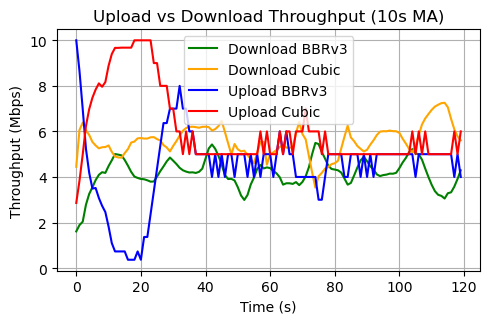

✅ Plot saved to: /home/sit/Desktop/fq/combined_plot_output/combined_throughput.png


In [18]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms
        bitspersec = min(stream.get("bits_per_second", 0) / 1e6, 10)  # cap throughput to 10 Mbps

        metrics.append({
            "time_sec": i + time_offset,
            "throughput_mbps": bitspersec,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)
def load_all_data():
    scenarios = {
        "Download BBRv3": "/home/sit/Desktop/Cake-plot/cubic-vs-bbr3-download-sender-bbr/bbr3_flow1_2.json",
        "Download Cubic": "/home/sit/Desktop/Cake-plot/cubic-vs-bbr3-download-sender-bbr/cubic_flow1_2.json",
        "Upload BBRv3": "/home/sit/Desktop/Cake-plot/cubic-vs-bbr3-upload-sender-bbr/bbr3_flow1_3.json",
        "Upload Cubic": "/home/sit/Desktop/Cake-plot/cubic-vs-bbr3-upload-sender-bbr/cubic_flow1_3.json"
    }

    all_data = []
    for label, path in scenarios.items():
        if os.path.exists(path):
            df = extract_metrics(path, label)
            all_data.append(df)
        else:
            print(f"❌ Missing: {path}")

    if not all_data:
        raise FileNotFoundError("No data found in any scenario.")

    return pd.concat(all_data, ignore_index=True)

def plot_moving_average(df, metric, ylabel, title, save_path, window=10):
    plt.figure(figsize=(5, 3.35))
    color_map = {
        "Download BBRv3": "green",
        "Download Cubic": "orange",
        "Upload BBRv3": "blue",
        "Upload Cubic": "red"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        group_sorted = group.sort_values("time_sec")
        ma = group_sorted[metric].rolling(window=window, min_periods=1).mean()
        plt.plot(group_sorted["time_sec"], ma, label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Plot saved to: {save_path}")

# -------------- Run --------------
output_folder = "/home/sit/Desktop/fq/combined_plot_output"
os.makedirs(output_folder, exist_ok=True)

df_all = load_all_data()
plot_moving_average(
    df_all,
    metric="throughput_mbps",
    ylabel="Throughput (Mbps)",
    title="Upload vs Download Throughput (10s MA)",
    save_path=os.path.join(output_folder, "combined_throughput.png"),
    window=10
)

# Optional: save CSV for record
df_all.to_csv(os.path.join(output_folder, "combined_metrics.csv"), index=False)


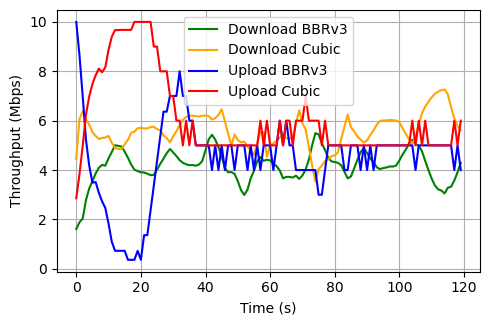

✅ Plot saved to: /home/sit/Desktop/fq/combined_plot_output/combined_throughput.png


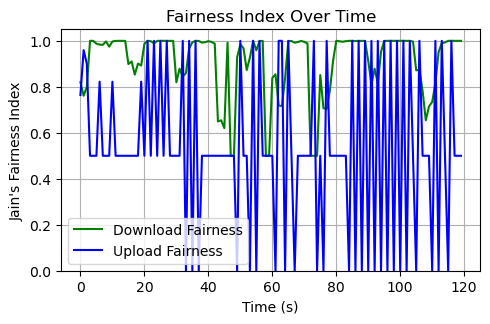

✅ Fairness plot saved to: /home/sit/Desktop/fq/combined_plot_output/fairness_index.png


In [ ]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

# -------- Extract metrics from iperf3 JSON --------
def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms
        bitspersec = min(stream.get("bits_per_second", 0) / 1e6, 10)  # cap at 10 Mbps

        metrics.append({
            "time_sec": i + time_offset,
            "throughput_mbps": bitspersec,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)

# -------- Load all data from defined scenarios --------
def load_all_data():
    scenarios = {
        "Download BBRv3": "/home/sit/Desktop/Cake-plot/cubic-vs-bbr3-download-sender-bbr/bbr3_flow1_2.json",
        "Download Cubic": "/home/sit/Desktop/Cake-plot/cubic-vs-bbr3-download-sender-bbr/cubic_flow1_2.json",
        "Upload BBRv3": "/home/sit/Desktop/Cake-plot/cubic-vs-bbr3-upload-sender-bbr/bbr3_flow1_3.json",
        "Upload Cubic": "/home/sit/Desktop/Cake-plot/cubic-vs-bbr3-upload-sender-bbr/cubic_flow1_3.json"
    }

    all_data = []
    for label, path in scenarios.items():
        if os.path.exists(path):
            df = extract_metrics(path, label)
            all_data.append(df)
        else:
            print(f"❌ Missing: {path}")

    if not all_data:
        raise FileNotFoundError("No data found in any scenario.")

    return pd.concat(all_data, ignore_index=True)

# -------- Plot throughput with moving average --------
def plot_moving_average(df, metric, ylabel, title, save_path, window=10):
    plt.figure(figsize=(5, 3.35))
    color_map = {
        "Download BBRv3": "green",
        "Download Cubic": "orange",
        "Upload BBRv3": "blue",
        "Upload Cubic": "red"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        group_sorted = group.sort_values("time_sec")
        ma = group_sorted[metric].rolling(window=window, min_periods=1).mean()
        plt.plot(group_sorted["time_sec"], ma, label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Plot saved to: {save_path}")

# -------- Plot Jain’s Fairness Index for Download and Upload --------
def plot_fairness_index(df, save_path):
    download_df = df[df["label"].str.contains("Download")]
    upload_df = df[df["label"].str.contains("Upload")]

    def compute_fairness(data):
        fairness_over_time = []
        for time, group in data.groupby("time_sec"):
            throughputs = group["throughput_mbps"].values
            n = len(throughputs)
            if n == 0:
                continue
            numerator = (throughputs.sum()) ** 2
            denominator = n * (throughputs ** 2).sum()
            fairness = numerator / denominator if denominator != 0 else 0
            fairness_over_time.append({"time_sec": time, "fairness_index": fairness})
        return pd.DataFrame(fairness_over_time).sort_values("time_sec")

    fairness_download = compute_fairness(download_df)
    fairness_upload = compute_fairness(upload_df)

    plt.figure(figsize=(5, 3.35))
    plt.plot(fairness_download["time_sec"], fairness_download["fairness_index"],
             label="Download Fairness", color="green")
    plt.plot(fairness_upload["time_sec"], fairness_upload["fairness_index"],
             label="Upload Fairness", color="blue")

    plt.xlabel("Time (s)")
    plt.ylabel("Jain's Fairness Index")
    plt.ylim(0, 1.05)
    plt.title("")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Fairness plot saved to: {save_path}")

# -------------- Run Script --------------
if __name__ == "__main__":
    output_folder = "/home/sit/Desktop/fq/combined_plot_output"
    os.makedirs(output_folder, exist_ok=True)

    df_all = load_all_data()

    # Plot throughput
    plot_moving_average(
        df_all,
        metric="throughput_mbps",
        ylabel="Throughput (Mbps)",
        title="",
        save_path=os.path.join(output_folder, "combined_throughput.png"),
        window=10
    )

    # Plot fairness
    plot_fairness_index(
        df_all,
        save_path=os.path.join(output_folder, "fairness_index.png")
    )

    # Save CSV
    df_all.to_csv(os.path.join(output_folder, "combined_metrics.csv"), index=False)
